In [1]:
# Common stuff reused by all applications
from analysis_common import *
%matplotlib inline


EXPERIMENT_SIZE_FIELDS = [
    "number_of_fragments",
    "points_per_fragment", 
]

PLATFORM_FIELDS = [
    "nodes",
    "cpus_per_node",
    "backends_per_node",
    "dataclay",
    "use_split",
]

HANDPICKED_OUTLIERS = []

In [2]:
db = DataStorage("histogram-split")
df = prepare_df(db, HANDPICKED_OUTLIERS)

df.drop(df[(df['id'] < 27740987) & (df['dask'] == 1)].index, inplace=True)
df.drop(df[(df['id'] < 28231260) & (df['dask'] == 1) & (df["use_split"] == 1)].index, inplace=True)  

# Comment those lines to evaluate the active vs non-active
df.query("use_active == 1 or dataclay == 0 or dask == 1", inplace=True)
del df['use_active']

In [3]:
edf = df.explode("iteration_time").sort_values('mode')
edf['iteration_time'] = edf['iteration_time'].astype(float)
winsorize_edf(edf, "iteration_time", ["mode", "nodes","points_per_fragment", "number_of_fragments"])

/home/alex/BSC/split-miniapps/analysis/analysis_common.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df[mask] = mstats.winsorize(working_df[mask], limits=[0, 0.1])


# Weak scaling (small blocks)

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


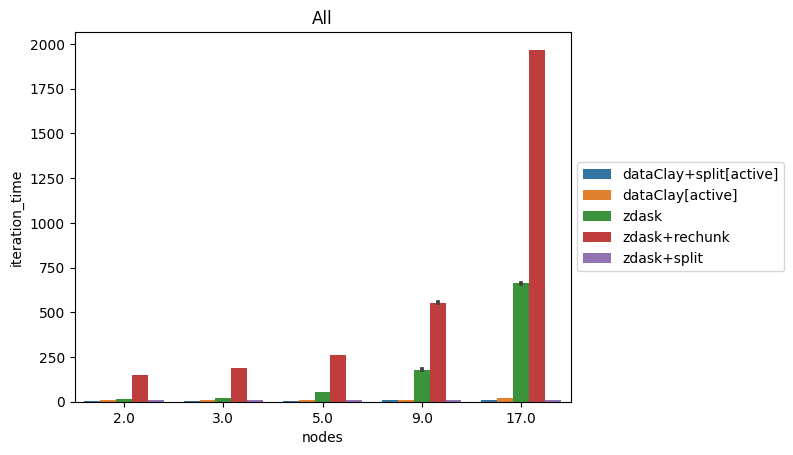

<Figure size 640x480 with 0 Axes>

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


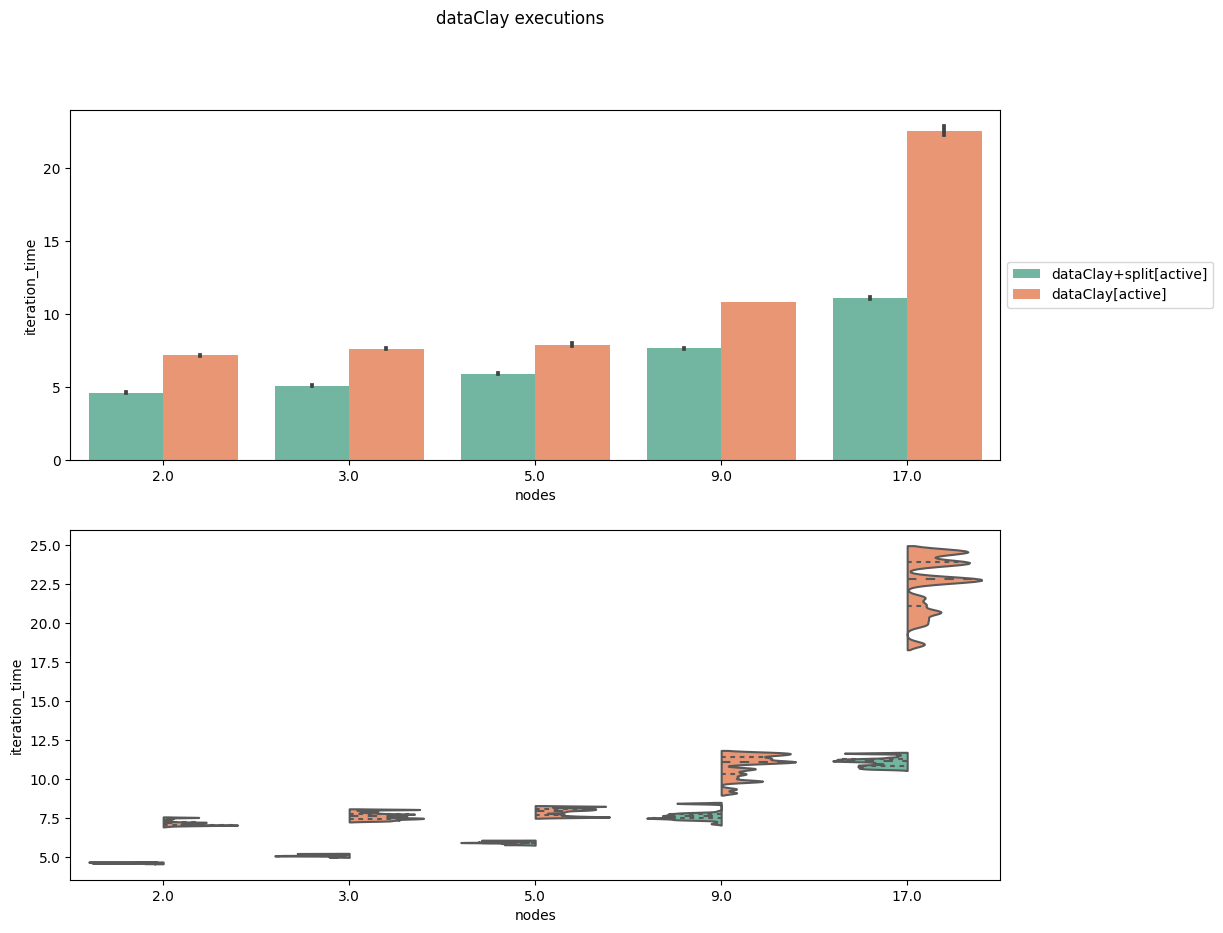

initialization_time  iteration_time
nodes mode                                                       
2.0   dataClay+split[active]            64.612378        4.611061
      dataClay[active]                  63.931954        7.175148
      zdask                              3.117787       13.896238
      zdask+rechunk                      3.386366      151.048798
      zdask+split                        3.533652        7.346167
3.0   dataClay+split[active]            77.608615        5.088196
      dataClay[active]                  77.832155        7.624541
      zdask                              3.577959       22.515883
      zdask+rechunk                      3.836140      188.763574
      zdask+split                        4.029589        7.443965
5.0   dataClay+split[active]           138.540755        5.910426
      dataClay[active]                 138.494650        7.896922
      zdask                              4.688845       53.944701
      zdask+rechunk                      4.951248      261.293942
      zdask+split                        5.123991        7.591595
9.0   dataClay+split[active]           269.777711        7.661485
      dataClay[active]                 272.046878       10.836524
      zdask                              6.832264      179.907634
      zdask+rechunk                      7.947064      554.629805
      zdask+split                        8.052187        7.693378
17.0  dataClay+split[active]           545.071353       11.091513
      dataClay[active]                 552.626036       22.530845
      zdask                             12.451191      662.188170
      zdask+rechunk                     15.031019     1967.813781
      zdask+split                       15.069970        8.074489

In [4]:
# Weak scaling
data = edf.query("((number_of_fragments / (nodes - 1)) == 2304) and (points_per_fragment == 384000)")
small_blocks_data = data.copy()
small_blocks_data["nodes"] -= 1

plot_things(data, "iteration_time")

data = data.drop(data.columns.difference(["nodes", "mode", "initialization_time","iteration_time"]), axis="columns")
data.groupby(["nodes", "mode"]).mean()

# Weak scaling (big blocks)

- 48 fragments **per node**
- Blocks are big

This experiment has the same size as the previous one. 

This is a bad scenario for the split; data is perfectly balanced, so there is no real benefit of doing a split. Because the job load is high, the overhead may not be extremely big.

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


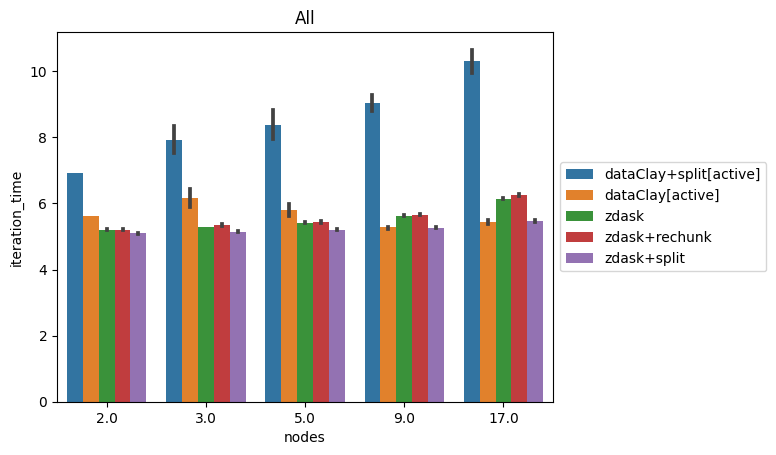

<Figure size 640x480 with 0 Axes>

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


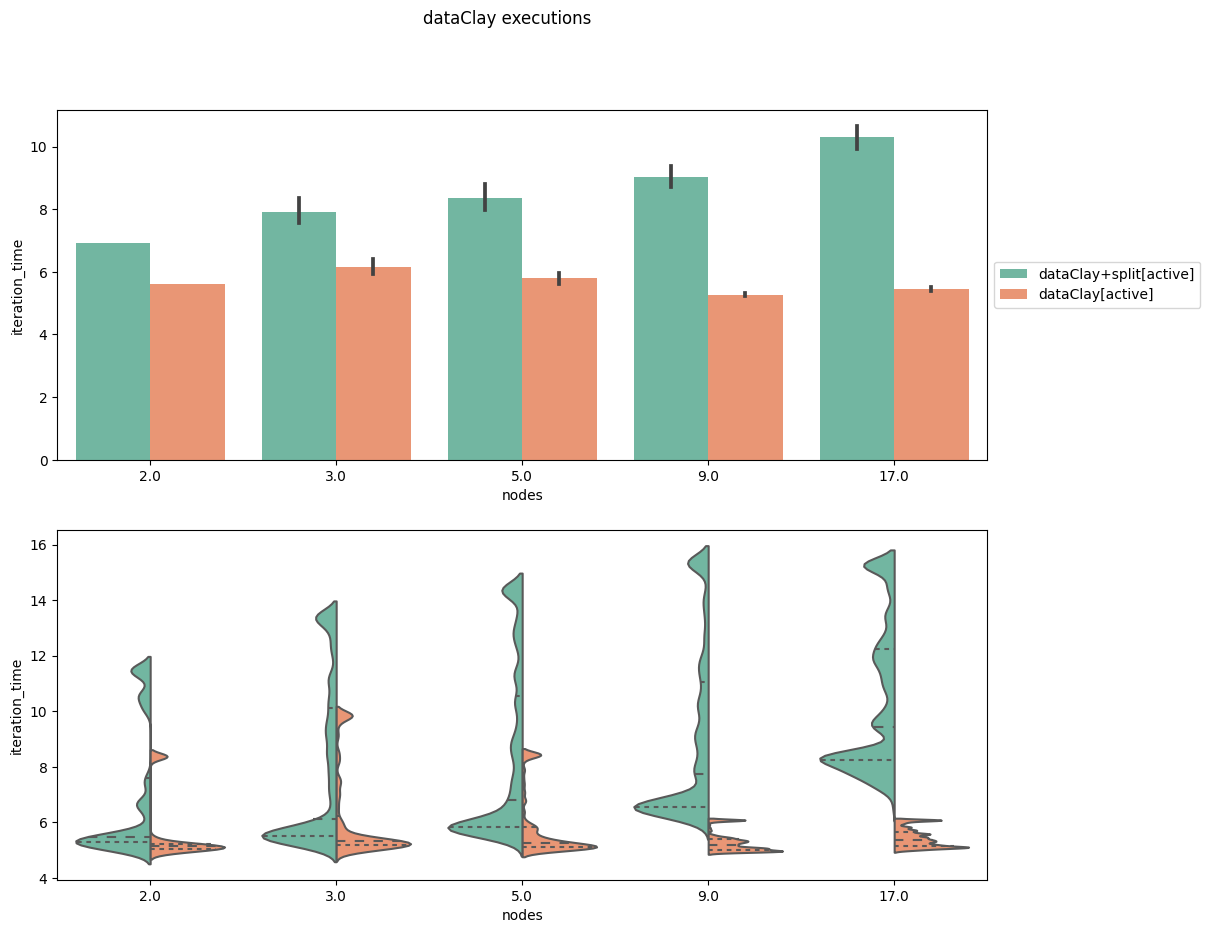

initialization_time  iteration_time
nodes mode                                                       
2.0   dataClay+split[active]            81.500582        6.928112
      dataClay[active]                  80.434805        5.606534
      zdask                              2.039098        5.210180
      zdask+rechunk                      1.994674        5.204348
      zdask+split                        2.157886        5.094030
3.0   dataClay+split[active]            93.085764        7.920258
      dataClay[active]                  91.997959        6.156996
      zdask                              2.192775        5.284847
      zdask+rechunk                      2.087313        5.347894
      zdask+split                        2.212311        5.148117
5.0   dataClay+split[active]           148.747607        8.371382
      dataClay[active]                 148.521050        5.788190
      zdask                              2.344602        5.407595
      zdask+rechunk                      2.063983        5.435916
      zdask+split                        2.228385        5.196922
9.0   dataClay+split[active]           272.480837        9.023596
      dataClay[active]                 273.093921        5.274116
      zdask                              2.384312        5.628002
      zdask+rechunk                      2.141713        5.657668
      zdask+split                        2.252586        5.258010
17.0  dataClay+split[active]           524.350941       10.296019
      dataClay[active]                 524.059702        5.446029
      zdask                              2.773505        6.137161
      zdask+rechunk                      2.271789        6.250152
      zdask+split                        2.277489        5.467340

In [5]:
# Weak scaling, with big blocks (48 blocks per node)
data = edf.query("((number_of_fragments / (nodes - 1)) == 48) and ((points_per_fragment) == (18432000))")
big_blocks_data = data.copy()
big_blocks_data["nodes"] -= 1

plot_things(data, "iteration_time")

data = data.drop(data.columns.difference(["nodes", "mode", "initialization_time","iteration_time"]), axis="columns")
data.groupby(["nodes", "mode"]).mean()

## Blocksize sweep

8 worker nodes, analyze multiple block sizes (from 128000 points per block to 48 blocks per node). Those are the scenarios of weak scaling (see previous experiments).

In [6]:
# Weak scaling, with big blocks (48 blocks per node)
data = edf.query("(nodes == 9) and ((number_of_fragments * points_per_fragment) == (18432000 * 48 * 8))")

def eval_granularity_index(row):
    row["granularity_index"] = row["number_of_fragments"] // (48 * 8)
    return row

data = data.apply(eval_granularity_index, axis=1)

data.drop(data[data["granularity_index"] == 8].index, inplace=True)

sweep_data = data.copy()

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


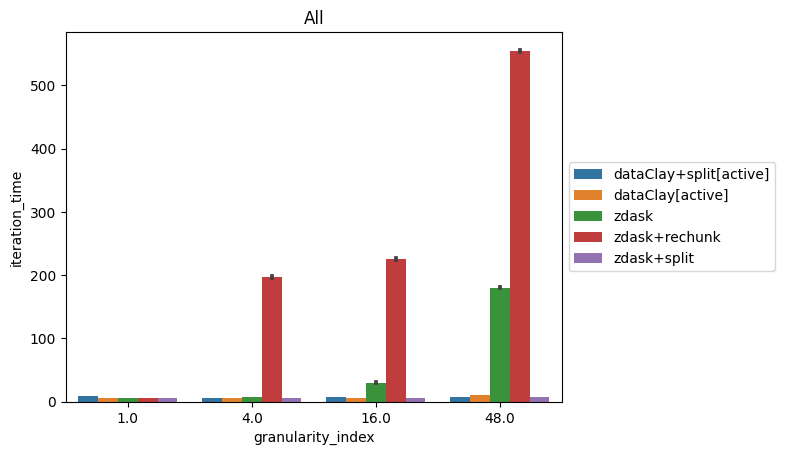

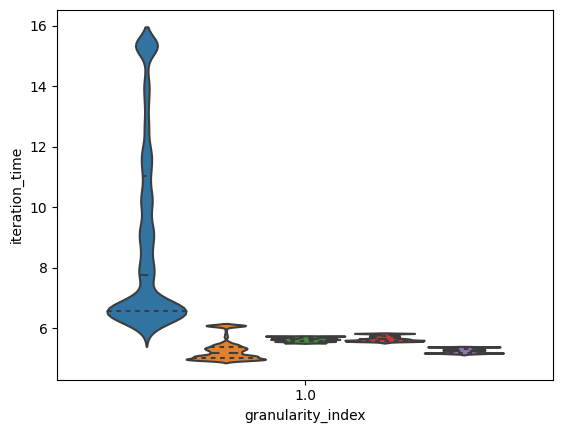

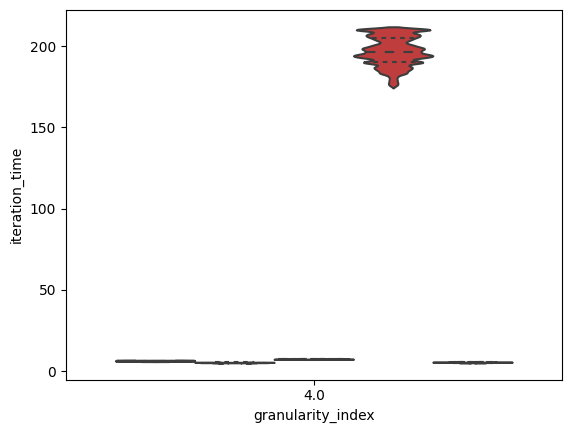

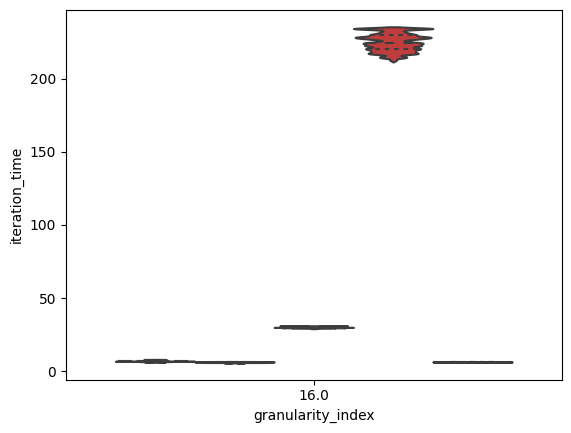

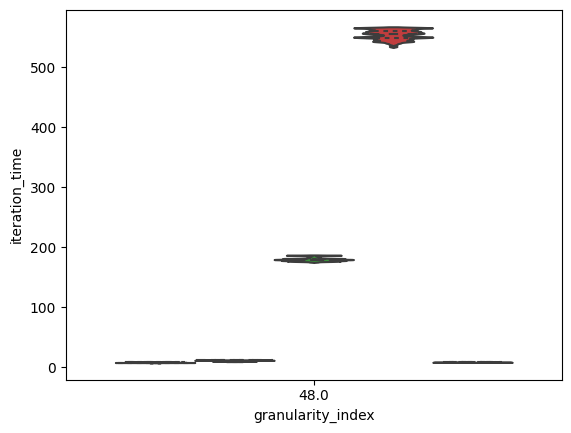

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


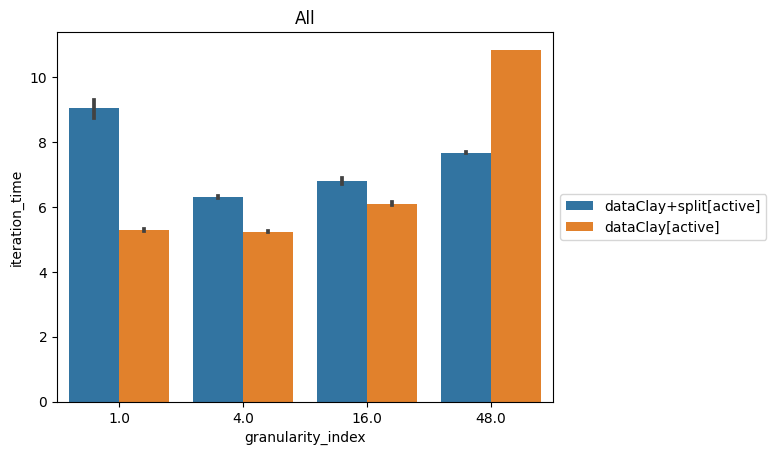

initialization_time  iteration_time
granularity_index mode                                                       
1.0               dataClay+split[active]           272.480837        9.023596
                  dataClay[active]                 273.093921        5.274116
                  zdask                              2.384312        5.628002
                  zdask+rechunk                      2.141713        5.657668
                  zdask+split                        2.252586        5.258010
4.0               dataClay+split[active]           266.307981        6.304188
                  dataClay[active]                 266.926050        5.228568
                  zdask                              2.647907        7.200651
                  zdask+rechunk                      2.479070      196.943316
                  zdask+split                        2.566341        5.337274
16.0              dataClay+split[active]           266.797096        6.777537
                  dataClay[active]                 265.562902        6.088091
                  zdask                              3.953930       30.106945
                  zdask+rechunk                      3.607015      224.972539
                  zdask+split                        3.656377        6.250043
48.0              dataClay+split[active]           269.777711        7.661485
                  dataClay[active]                 272.046878       10.836524
                  zdask                              6.832264      179.907634
                  zdask+rechunk                      7.947064      554.629805
                  zdask+split                        8.052187        7.693378

In [7]:
sns.barplot(data=data, x="granularity_index", hue="mode", y="iteration_time", 
            estimator=ESTIMATOR_TO_USE)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()

for i in [1, 4, 16, 48]:
    ax = sns.violinplot(data=data.query("granularity_index == %d" % i),
                        x="granularity_index", hue="mode", y="iteration_time", 
                        scale='width', bw=VIOLIN_BW,
                        inner="quartile", figsize=123)
    ax.get_legend().remove()
    plt.show()

sns.barplot(data=data.query("dataclay == 1"), x="granularity_index", hue="mode", y="iteration_time", 
            estimator=ESTIMATOR_TO_USE)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
plt.show()

data = data.drop(data.columns.difference(["granularity_index", "mode", "initialization_time","iteration_time"]), axis="columns")
data.groupby(["granularity_index", "mode"]).mean()


# Figure generation

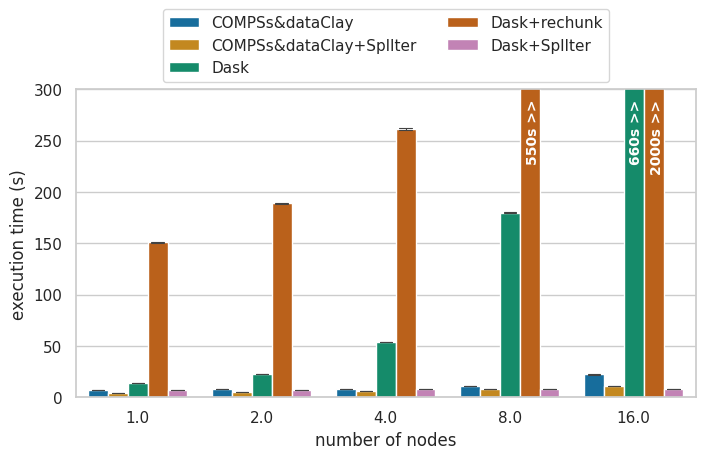

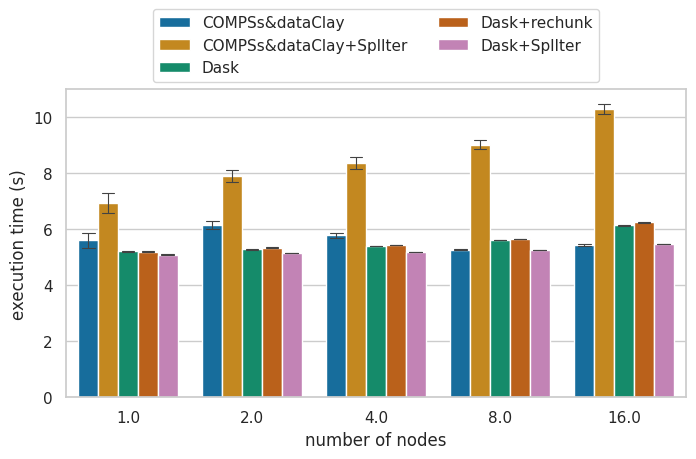

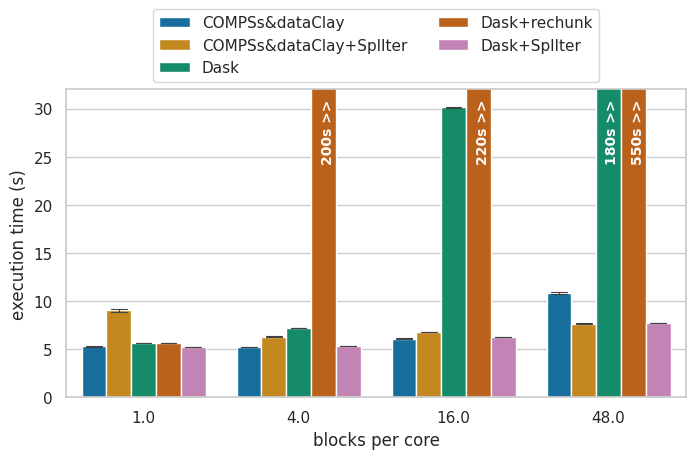

In [10]:
sns.set(style="whitegrid", color_codes=True)

hue_order=["dataClay[active]", "dataClay+split[active]", "zdask", "zdask+rechunk", "zdask+split"]

ax = sns.barplot(y="iteration_time", x="nodes", hue="mode",
                 data=small_blocks_data,
                 capsize=0.1,
                 errwidth=0.8,
                 errorbar="se",
                 hue_order=hue_order,
                 palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs&dataClay", "COMPSs&dataClay+SplIter", "Dask", "Dask+rechunk", "Dask+SplIter"])
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True,
)

# Special case: let's force the y_lim and let's write the value inside the bar
ax.set_ylim([0, 300])
ax.text(3.19, 300, "550s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)
ax.text(4.19, 300, "2000s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)
ax.text(4.02, 300, "660s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)

save_tweaks("histogram-weakscaling_smallblocks.pdf")
plt.show()

ax = sns.barplot(y="iteration_time", x="nodes", hue="mode",
                 data=big_blocks_data,
                 capsize=0.1,
                 errwidth=0.8,
                 errorbar="se",
                 hue_order=hue_order,
                 palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs&dataClay", "COMPSs&dataClay+SplIter", "Dask", "Dask+rechunk", "Dask+SplIter"])
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True,
)

save_tweaks("histogram-weakscaling_bigblocks.pdf")
plt.show()

ax = sns.barplot(y="iteration_time", x="granularity_index", hue="mode",
                 data=sweep_data,
                 capsize=0.1,
                 errwidth=0.8,
                 errorbar="se",
                 hue_order=hue_order,
                 palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs&dataClay", "COMPSs&dataClay+SplIter", "Dask", "Dask+rechunk", "Dask+SplIter"])
ax.set_ylabel("execution time (s)")
ax.set_xlabel("blocks per core")

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True,
)

ax.set_ylim([0, 32])
ax.text(1.19, 32, "200s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)
ax.text(2.19, 32, "220s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)
ax.text(3.19, 32, "550s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)
ax.text(3.02, 32, "180s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)

save_tweaks("histogram-blocksweep.pdf")
plt.show()


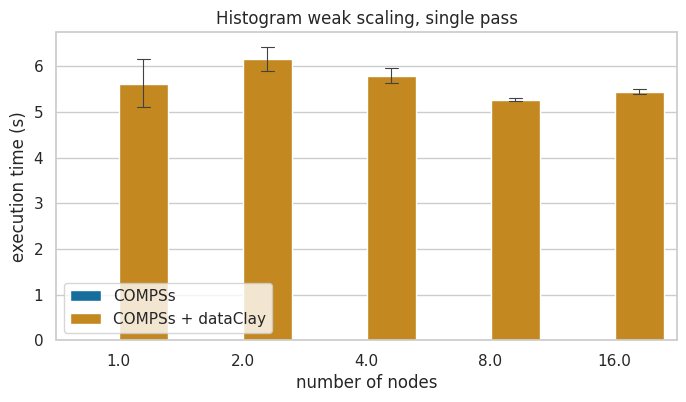

In [9]:
hue_order=["COMPSs", "dataClay[active]"]

ax = sns.barplot(y="iteration_time", x="nodes", hue="mode",
                 data=big_blocks_data,
                 capsize=0.1,
                 errwidth=0.8,
                 hue_order=hue_order,
                 palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs", "COMPSs + dataClay"])
ax.set_title("Histogram weak scaling, single pass")
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

save_tweaks("histogram-anotherpresentation.png")
plt.show()
